### Assumptions

*** The data is for multiple companies and not a single company

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import arff
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
import config
%matplotlib inline

In [2]:
pd.options.display.max_rows=100
pd.options.display.max_columns=100
pd.options.display.max_info_rows=100
pd.options.display.max_info_columns=100

In [3]:
def read_file(path):
    data = arff.loadarff(path)
    df = pd.DataFrame(data[0])
    df.iloc[:, -1] = df.iloc[:, -1].astype('int32')
    return df

In [4]:
def get_attribute_from_file(path, sep='\t'):
    data = pd.read_csv(path, sep=sep, header=None)
    attributes = data.iloc[:, 1].tolist()
    return attributes

In [5]:
def concat_dfs(df_list):
    for idx, df in enumerate(df_list):
        df['#years'] = len(df_list) - idx

    df = pd.concat(df_list, axis=0)
    return df

In [6]:
def rename_columns(df, cols):
    df.columns.values[:-2] = cols
    return df

In [7]:
data_1year = read_file(config.filepath_1year)
data_2year = read_file(config.filepath_2year)
data_3year = read_file(config.filepath_3year)
data_4year = read_file(config.filepath_4year)
data_5year = read_file(config.filepath_5year)

In [8]:
columns = get_attribute_from_file(config.attribute_file_path)

In [9]:
print('Total number of columns in the file is: ', len(columns))
columns[:5]

Total number of columns in the file is:  64


['net profit / total assets ',
 'total liabilities / total assets ',
 'working capital / total assets ',
 'current assets / short-term liabilities ',
 '[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365 ']

In [10]:
list_dfs = [data_5year, data_4year, data_2year, data_3year, data_1year]

data = concat_dfs(list_dfs)
data = rename_columns(data, columns)

In [11]:
missing_value_df = pd.DataFrame({'column_name': data.columns,
                                 'percent_missing': 100 * data.isnull().sum() / data.shape[0],
                                 'percent_missing_class_1' : 100 * data[data['class']==1].isnull().sum() / data[data['class']==1].shape[0],
                                 'percent_missing_1year_class_1' : 100 * data[(data['class']==1) & (data['#years']==1)].isnull().sum() / data[(data['class']==1) & (data['#years']==1)].shape[0],
                                 'percent_missing_2year_class_1' : 100 * data[(data['class']==1) & (data['#years']==2)].isnull().sum() / data[(data['class']==1) & (data['#years']==2)].shape[0],
                                 'percent_missing_3year_class_1' : 100 * data[(data['class']==1) & (data['#years']==3)].isnull().sum() / data[(data['class']==1) & (data['#years']==3)].shape[0],
                                 'percent_missing_4year_class_1' : 100 * data[(data['class']==1) & (data['#years']==4)].isnull().sum() / data[(data['class']==1) & (data['#years']==4)].shape[0],
                                 'percent_missing_4year_class_1' : 100 * data[(data['class']==1) & (data['#years']==5)].isnull().sum() / data[(data['class']==1) & (data['#years']==5)].shape[0]})

missing_value_df = missing_value_df.sort_values(['percent_missing','percent_missing_class_1'], ascending=False)

In [12]:
missing_value_df

,column_name,percent_missing,percent_missing_class_1,percent_missing_1year_class_1,percent_missing_2year_class_1,percent_missing_3year_class_1,percent_missing_4year_class_1
(current assets - inventories) / long-term liabilities,(current assets - inventories) / long-term lia...,43.736897,46.724055,38.745387,45.454545,44.50,51.219512
sales (n) / sales (n-1),sales (n) / sales (n-1),13.486925,29.411765,40.221402,28.282828,38.50,24.146341
profit on operating activities / financial expenses,profit on operating activities / financial exp...,6.367930,34.194165,44.280443,33.737374,37.75,30.000000
sales / inventory,sales / inventory,4.957954,8.417025,5.166052,8.484848,7.25,9.268293
net profit / inventory,net profit / inventory,4.946435,8.417025,5.166052,8.484848,7.25,9.268293
gross profit (in 3 years) / total assets,gross profit (in 3 years) / total assets,2.124179,0.047824,0.000000,0.000000,0.00,0.243902
working capital / fixed assets,working capital / fixed assets,1.870752,3.825921,2.214022,2.828283,3.25,4.634146
equity / fixed assets,equity / fixed assets,1.870752,3.825921,2.214022,2.828283,3.25,4.634146
constant capital / fixed assets,constant capital / fixed assets,1.870752,3.825921,2.214022,2.828283,3.25,4.634146
sales / fixed assets,sales / fixed assets,1.870752,3.825921,2.214022,2.828283,3.25,4.634146


### A date field would have been interesting in identifying the trend for missing information in the columns. for now the yearly trends looks positive for some columns and noisy for others

In [13]:
missing_value_df[missing_value_df.percent_missing_class_1>1.5]

,column_name,percent_missing,percent_missing_class_1,percent_missing_1year_class_1,percent_missing_2year_class_1,percent_missing_3year_class_1,percent_missing_4year_class_1
(current assets - inventories) / long-term liabilities,(current assets - inventories) / long-term lia...,43.736897,46.724055,38.745387,45.454545,44.50,51.219512
sales (n) / sales (n-1),sales (n) / sales (n-1),13.486925,29.411765,40.221402,28.282828,38.50,24.146341
profit on operating activities / financial expenses,profit on operating activities / financial exp...,6.367930,34.194165,44.280443,33.737374,37.75,30.000000
sales / inventory,sales / inventory,4.957954,8.417025,5.166052,8.484848,7.25,9.268293
net profit / inventory,net profit / inventory,4.946435,8.417025,5.166052,8.484848,7.25,9.268293
working capital / fixed assets,working capital / fixed assets,1.870752,3.825921,2.214022,2.828283,3.25,4.634146
equity / fixed assets,equity / fixed assets,1.870752,3.825921,2.214022,2.828283,3.25,4.634146
constant capital / fixed assets,constant capital / fixed assets,1.870752,3.825921,2.214022,2.828283,3.25,4.634146
sales / fixed assets,sales / fixed assets,1.870752,3.825921,2.214022,2.828283,3.25,4.634146
(gross profit + extraordinary items + financial expenses) / total assets,(gross profit + extraordinary items + financia...,0.101371,1.769488,13.284133,0.000000,0.00,0.243902


In [14]:
for col in missing_value_df[missing_value_df.percent_missing>1.5].column_name:
    print(f'\n\nColumn name : {col}\n\n',data[data[col].isnull()]['class'].value_counts())



Column name : (current assets - inventories) / long-term liabilities 

 0    18007
1      977
Name: class, dtype: int64


Column name : sales (n) / sales (n-1) 

 0    5239
1     615
Name: class, dtype: int64


Column name : profit on operating activities / financial expenses 

 0    2049
1     715
Name: class, dtype: int64


Column name : sales / inventory 

 0    1976
1     176
Name: class, dtype: int64


Column name : net profit / inventory 

 0    1971
1     176
Name: class, dtype: int64


Column name : gross profit (in 3 years) / total assets 

 0    921
1      1
Name: class, dtype: int64


Column name : working capital / fixed assets 

 0    732
1     80
Name: class, dtype: int64


Column name : equity / fixed assets 

 0    732
1     80
Name: class, dtype: int64


Column name : constant capital / fixed assets 

 0    732
1     80
Name: class, dtype: int64


Column name : sales / fixed assets

 0    732
1     80
Name: class, dtype: int64


Column name : total liabilities / ((pr

In [15]:
for col in missing_value_df[missing_value_df.percent_missing>1.5].column_name:
    print(f'\n\nColumn name : {col}\n\n',data[data[col].isnull()]['class'].value_counts(normalize=True)*100)



Column name : (current assets - inventories) / long-term liabilities 

 0    94.853561
1     5.146439
Name: class, dtype: float64


Column name : sales (n) / sales (n-1) 

 0    89.494363
1    10.505637
Name: class, dtype: float64


Column name : profit on operating activities / financial expenses 

 0    74.131693
1    25.868307
Name: class, dtype: float64


Column name : sales / inventory 

 0    91.821561
1     8.178439
Name: class, dtype: float64


Column name : net profit / inventory 

 0    91.802515
1     8.197485
Name: class, dtype: float64


Column name : gross profit (in 3 years) / total assets 

 0    99.89154
1     0.10846
Name: class, dtype: float64


Column name : working capital / fixed assets 

 0    90.147783
1     9.852217
Name: class, dtype: float64


Column name : equity / fixed assets 

 0    90.147783
1     9.852217
Name: class, dtype: float64


Column name : constant capital / fixed assets 

 0    90.147783
1     9.852217
Name: class, dtype: float64


Column na

In [16]:
filtered_df = data.loc[:,data.columns.isin(missing_value_df[missing_value_df.percent_missing>1.5].column_name)]
filtered_df['class'] = data['class']
filtered_df.corr()

,sales (n) / sales (n-1),gross profit (in 3 years) / total assets,profit on operating activities / financial expenses,working capital / fixed assets,(current assets - inventories) / long-term liabilities,total liabilities / ((profit on operating activities + depreciation) * (12/365)),net profit / inventory,equity / fixed assets,constant capital / fixed assets,sales / inventory,sales / fixed assets,class
sales (n) / sales (n-1),1.000000,-0.000555,-0.000364,-0.000223,-0.000406,-0.000064,-0.000037,-0.000149,-0.000148,-0.000126,-0.000255,-0.002238
gross profit (in 3 years) / total assets,-0.000555,1.000000,0.006812,0.001268,0.000139,-0.000056,0.000399,0.100630,0.100074,0.045701,0.159593,-0.015325
profit on operating activities / financial expenses,-0.000364,0.006812,1.000000,0.002698,0.000746,-0.000175,0.000492,0.000648,0.000622,-0.000230,0.001209,-0.005753
working capital / fixed assets,-0.000223,0.001268,0.002698,1.000000,0.003713,-0.000200,0.000159,0.102206,0.119563,0.000240,0.298673,-0.004188
(current assets - inventories) / long-term liabilities,-0.000406,0.000139,0.000746,0.003713,1.000000,-0.000235,0.000200,-0.000519,-0.000573,-0.000263,-0.001211,-0.002938
total liabilities / ((profit on operating activities + depreciation) * (12/365)),-0.000064,-0.000056,-0.000175,-0.000200,-0.000235,1.000000,-0.000037,-0.000094,-0.000107,-0.000076,-0.000163,-0.001259
net profit / inventory,-0.000037,0.000399,0.000492,0.000159,0.000200,-0.000037,1.000000,-0.000071,-0.000073,0.522915,-0.000019,-0.000954
equity / fixed assets,-0.000149,0.100630,0.000648,0.102206,-0.000519,-0.000094,-0.000071,1.000000,0.998697,-0.000185,0.924560,0.004777
constant capital / fixed assets,-0.000148,0.100074,0.000622,0.119563,-0.000573,-0.000107,-0.000073,0.998697,1.000000,-0.000176,0.925560,0.004802
sales / inventory,-0.000126,0.045701,-0.000230,0.000240,-0.000263,-0.000076,0.522915,-0.000185,-0.000176,1.000000,0.014150,-0.002133


<AxesSubplot:>

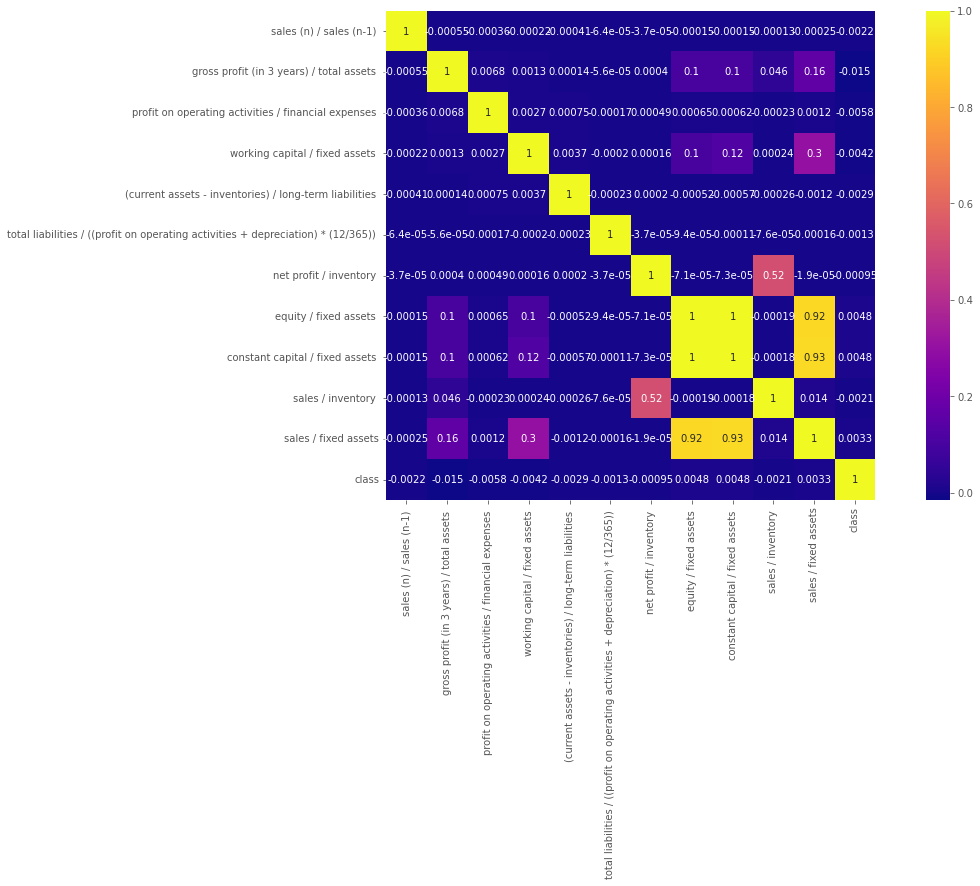

In [17]:
plt.figure(figsize=(18,9))
sns.heatmap(filtered_df.corr(),square=True,annot=True,cmap=plt.cm.plasma)

In [18]:
data['class'].value_counts()

0    41314
1     2091
Name: class, dtype: int64

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.]),
 [Text(-10.0, 0, 'logarithm of total assets '),
  Text(0.0, 0, '(current assets - inventories) / long-term liabilities '),
  Text(10.0, 0, 'total liabilities / ((profit on operating activities + depreciation) * (12/365)) '),
  Text(20.0, 0, 'gross profit / sales '),
  Text(30.0, 0, 'EBITDA (profit on operating activities - depreciation) / sales '),
  Text(40.0, 0, '[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365 '),
  Text(50.0, 0, 'EBIT / total assets '),
  Text(60.0, 0, 'short-term liabilities / total assets '),
  Text(70.0, 0, '')])

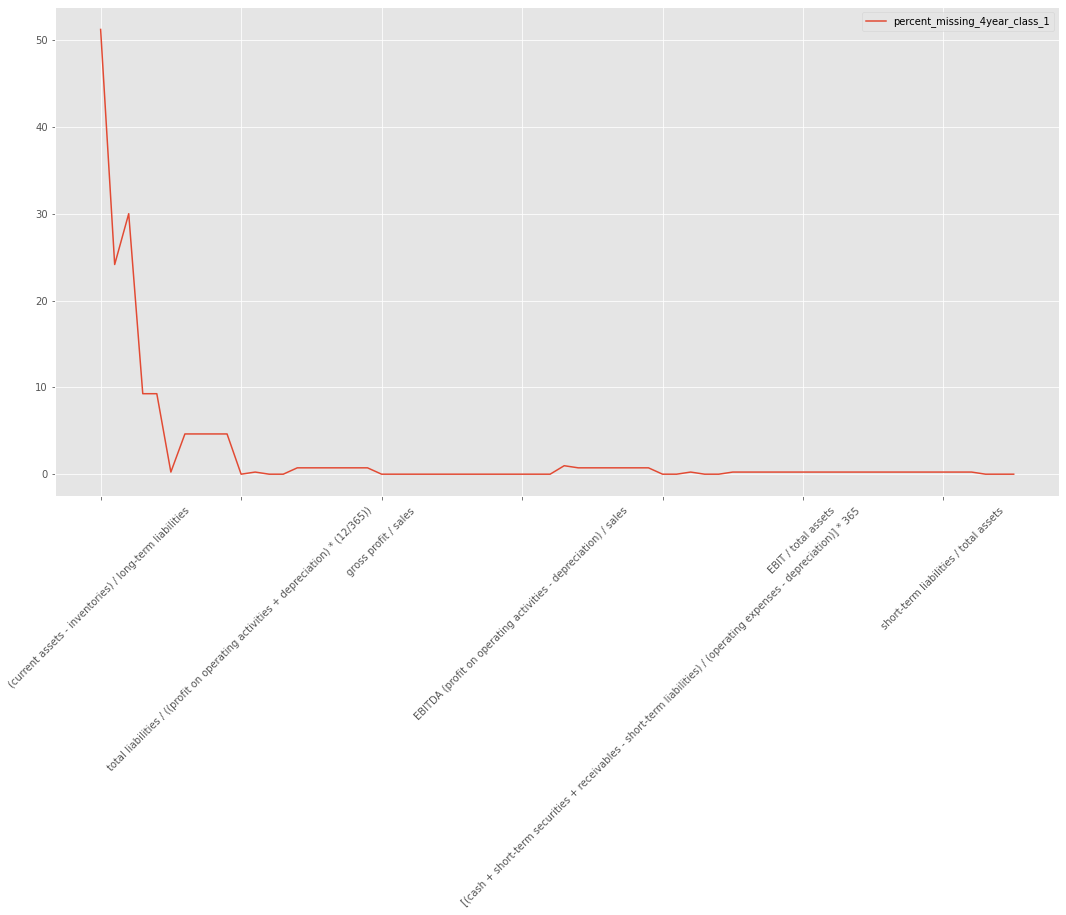

In [19]:
missing_value_df.iloc[:,[0,-1]].plot(figsize = (18,9))
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '(current assets - inventories) / long-term liabilities '),
  Text(1, 0, 'sales (n) / sales (n-1) '),
  Text(2, 0, 'profit on operating activities / financial expenses '),
  Text(3, 0, 'sales / inventory '),
  Text(4, 0, 'net profit / inventory '),
  Text(5, 0, 'working capital / fixed assets '),
  Text(6, 0, 'equity / fixed assets '),
  Text(7, 0, 'constant capital / fixed assets '),
  Text(8, 0, 'sales / fixed assets'),
  Text(9, 0, '(gross profit + extraordinary items + financial expenses) / total assets ')])

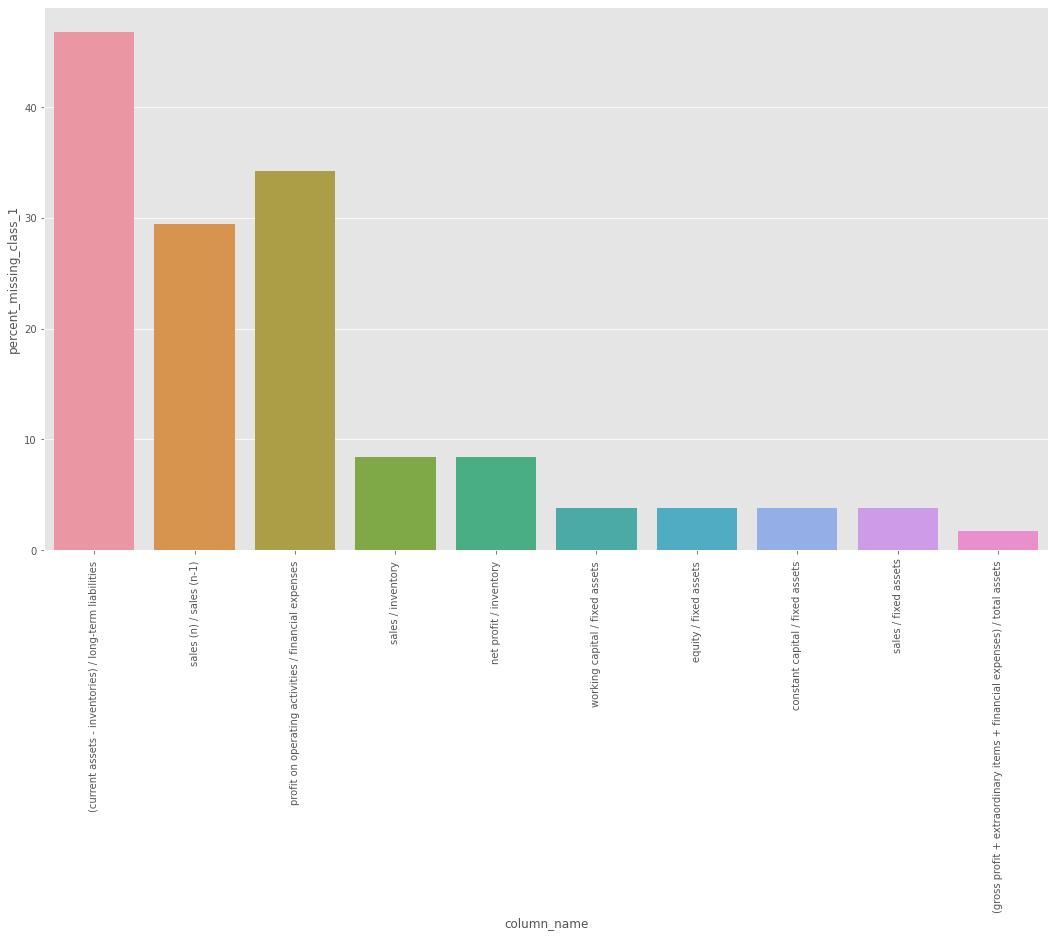

In [20]:
plt.figure(figsize=(18,10))
sns.barplot(missing_value_df[missing_value_df['percent_missing_class_1']>1]['column_name'],missing_value_df[missing_value_df['percent_missing_class_1']>1]['percent_missing_class_1'])
plt.xticks(rotation = 90)

### Since the % of missing values in the positive class is too high, we cannot drop the missing records.
### Need to either impute them or create a flag for missing value indicator.
### Need to check for outliers too

In [21]:
data.loc[:,data.columns.isin(missing_value_df[missing_value_df.percent_missing>0].column_name)].describe()

,net profit / total assets,total liabilities / total assets,working capital / total assets,current assets / short-term liabilities,[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365,retained earnings / total assets,EBIT / total assets,book value of equity / total liabilities,sales / total assets,equity / total assets,(gross profit + extraordinary items + financial expenses) / total assets,gross profit / short-term liabilities,(gross profit + depreciation) / sales,(gross profit + interest) / total assets,(total liabilities * 365) / (gross profit + depreciation),(gross profit + depreciation) / total liabilities,total assets / total liabilities,gross profit / total assets,gross profit / sales,(inventory * 365) / sales,sales (n) / sales (n-1),profit on operating activities / total assets,net profit / sales,gross profit (in 3 years) / total assets,(equity - share capital) / total assets,(net profit + depreciation) / total liabilities,profit on operating activities / financial expenses,working capital / fixed assets,logarithm of total assets,(total liabilities - cash) / sales,(gross profit + interest) / sales,(current liabilities * 365) / cost of products sold,operating expenses / short-term liabilities,operating expenses / total liabilities,profit on sales / total assets,total sales / total assets,(current assets - inventories) / long-term liabilities,constant capital / total assets,profit on sales / sales,(current assets - inventory - receivables) / short-term liabilities,total liabilities / ((profit on operating activities + depreciation) * (12/365)),profit on operating activities / sales,rotation receivables + inventory turnover in days,(receivables * 365) / sales,net profit / inventory,(current assets - inventory) / short-term liabilities,(inventory * 365) / cost of products sold,EBITDA (profit on operating activities - depreciation) / total assets,EBITDA (profit on operating activities - depreciation) / sales,current assets / total liabilities,short-term liabilities / total assets,(short-term liabilities * 365) / cost of products sold),equity / fixed assets,constant capital / fixed assets,working capital,(sales - cost of products sold) / sales,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),total costs /total sales,long-term liabilities / equity,sales / inventory,sales / receivables,(short-term liabilities *365) / sales,sales / short-term liabilities,sales / fixed assets
count,43397.000000,43397.000000,43397.000000,43271.000000,4.331600e+04,43397.000000,43397.000000,43311.000000,43396.000000,43397.000000,43361.000000,43271.000000,43278.000000,43397.000000,4.336900e+04,43310.000000,43311.000000,43397.000000,43277.000000,4.327800e+04,37551.000000,43397.000000,43278.000000,42483.000000,43397.000000,43310.000000,4.064100e+04,42593.000000,43397.000000,43278.000000,43278.000000,4.303700e+04,43271.000000,43311.000000,43397.000000,43397.000000,24421.000000,43397.000000,43278.000000,43271.000000,42651.000000,43278.000000,4.327800e+04,4.327800e+04,41258.000000,43270.000000,4.310800e+04,43396.000000,43278.000000,43311.000000,43397.000000,43104.000000,42593.000000,42593.000000,4.340400e+04,4.327800e+04,43398.000000,4.332100e+04,43398.000000,4.125300e+04,43303.000000,4.327800e+04,43271.000000,42593.000000
mean,0.035160,0.590212,0.114431,6.314702,-3.853466e+02,-0.056107,0.093478,12.640779,2.652166,0.626868,0.131075,1.132430,0.809544,0.093489,1.991890e+03,1.411167,13.802535,0.098565,0.156277,2.430209e+02,3.884997,0.113923,0.138582,0.270012,0.392844,1.263864,1.107896e+03,6.003208,4.005020,7.370821,0.176847,1.162621e+03,8.636016,5.411439,0.111908,2.911241,105.085363,0.724357,-0.289102,2.147411,7.717806,-0.142514,1.074125e+03,8.311085e+02,14.825016,5.428857,3.578418e+02,0.028584,-0.482584,5.835373,0.483521,6.478459,23.772623,24.654700,7.672188e+03,-2.621959e+01,-0.010510,3.002644e+01,1.333288,4.480858e+02,17.033202,1.502328e+03,9.34307

In [22]:
data.loc[:,data.columns.isin(missing_value_df[missing_value_df.percent_missing>0].column_name)].head()

,net profit / total assets,total liabilities / total assets,working capital / total assets,current assets / short-term liabilities,[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365,retained earnings / total assets,EBIT / total assets,book value of equity / total liabilities,sales / total assets,equity / total assets,(gross profit + extraordinary items + financial expenses) / total assets,gross profit / short-term liabilities,(gross profit + depreciation) / sales,(gross profit + interest) / total assets,(total liabilities * 365) / (gross profit + depreciation),(gross profit + depreciation) / total liabilities,total assets / total liabilities,gross profit / total assets,gross profit / sales,(inventory * 365) / sales,sales (n) / sales (n-1),profit on operating activities / total assets,net profit / sales,gross profit (in 3 years) / total assets,(equity - share capital) / total assets,(net profit + depreciation) / total liabilities,profit on operating activities / financial expenses,working capital / fixed assets,logarithm of total assets,(total liabilities - cash) / sales,(gross profit + interest) / sales,(current liabilities * 365) / cost of products sold,operating expenses / short-term liabilities,operating expenses / total liabilities,profit on sales / total assets,total sales / total assets,(current assets - inventories) / long-term liabilities,constant capital / total assets,profit on sales / sales,(current assets - inventory - receivables) / short-term liabilities,total liabilities / ((profit on operating activities + depreciation) * (12/365)),profit on operating activities / sales,rotation receivables + inventory turnover in days,(receivables * 365) / sales,net profit / inventory,(current assets - inventory) / short-term liabilities,(inventory * 365) / cost of products sold,EBITDA (profit on operating activities - depreciation) / total assets,EBITDA (profit on operating activities - depreciation) / sales,current assets / total liabilities,short-term liabilities / total assets,(short-term liabilities * 365) / cost of products sold),equity / fixed assets,constant capital / fixed assets,working capital,(sales - cost of products sold) / sales,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),total costs /total sales,long-term liabilities / equity,sales / inventory,sales / receivables,(short-term liabilities *365) / sales,sales / short-term liabilities,sales / fixed assets
0,0.088238,0.55472,0.01134,1.0205,-66.5200,0.342040,0.109490,0.57752,1.0881,0.32036,0.109490,0.197600,0.096885,0.109490,1475.20,0.247420,1.8027,0.109490,0.077287,50.199,1.15740,0.135230,0.062287,0.41949,0.320360,0.209120,1.03870,0.026093,6.1267,0.377880,0.077287,155.330,2.3498,0.24377,0.135230,1.4493,571.3700,0.32101,0.095457,0.128790,0.111890,0.095457,127.30,77.096,0.452890,0.66883,54.621,0.107460,0.075859,1.01930,0.55407,0.42557,0.73717,0.73866,15182.0000,0.080955,0.275430,0.91905,0.002024,7.2711,4.7343,142.760,2.5568,3.2597
1,-0.006202,0.48465,0.23298,1.5998,6.1825,0.000000,-0.006202,1.06340,1.2757,0.51535,0.001329,-0.015967,0.037544,-0.006202,3693.40,0.098825,2.0634,-0.006202,-0.004862,59.923,1.01580,0.001289,-0.004862,NaN,0.080285,0.098825,0.17118,0.615450,4.0022,0.363810,0.000778,108.050,3.3779,2.70750,-0.036475,1.2757,5.2519,0.59380,-0.028591,0.057810,0.291670,0.001011,171.38,111.450,-0.029614,1.06060,58.258,-0.052809,-0.041395,1.28230,0.38846,0.29604,1.36140,1.56860,2341.8000,-0.028591,-0.012035,1.00470,0.152220,6.0911,3.2749,111.140,3.2841,3.3700
2,0.130240,0.22142,0.57751,3.6082,120.0400,0.187640,0.162120,3.05900,1.1415,0.67731,0.162120,0.732180,0.165680,0.162120,431.75,0.845390,4.5164,0.162120,0.143490,41.508,1.23620,0.145860,0.115280,0.23566,0.677310,0.701430,1.47370,2.872100,4.7622,0.050069,0.143490,81.653,4.4701,0.65878,0.145860,1.1698,NaN,0.67731,0.129100,1.319600,0.042587,0.129100,163.71,122.200,1.013700,3.02800,47.382,0.120800,0.10692

<AxesSubplot:xlabel='sales / inventory '>

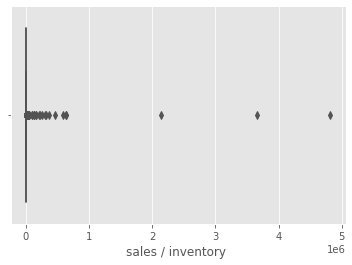

In [23]:
sns.boxplot(data['sales / inventory '],hue = data['class'])

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43405 entries, 0 to 7026
Data columns (total 66 columns):
 #   Column                                                                                                                Dtype  
---  ------                                                                                                                -----  
 0   net profit / total assets                                                                                             float64
 1   total liabilities / total assets                                                                                      float64
 2   working capital / total assets                                                                                        float64
 3   current assets / short-term liabilities                                                                               float64
 4   [(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - deprec

In [25]:
data_4year.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr37,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class,#years
0,0.159290,0.46240,0.07773,1.1683,-44.853,0.467020,0.189480,0.82895,1.1223,0.38330,0.189480,0.41025,0.155480,0.189480,771.49,0.47311,2.1626,0.189480,0.134660,46.838,1.03460,0.180820,0.113210,0.57607,0.383300,0.40783,1.44230,0.16882,6.0662,0.309150,0.134660,134.470,2.7144,0.39104,0.180820,1.4771,658.7000,0.38385,0.128510,0.167020,0.072354,0.128510,119.96,73.126,0.88223,0.77736,52.568,0.151530,0.107690,1.1669,0.46185,0.36840,0.83251,0.8337,90533.0,0.108990,0.41557,0.89101,0.001422,7.7928,4.9914,119.810,3.0465,3.0560,0,4
1,-0.127430,0.46243,0.26917,1.7517,7.597,0.000925,-0.127430,1.16250,1.2944,0.53757,-0.123210,-0.35587,-0.069684,-0.127430,-1871.30,-0.19506,2.1625,-0.127430,-0.098443,67.186,0.65665,-0.080134,-0.098443,NaN,0.089142,-0.19506,-18.99600,0.72207,3.9891,0.347020,-0.095184,92.684,3.9381,3.04930,-0.115680,1.2944,4.8106,0.61842,-0.089372,0.042359,-0.359250,-0.061907,172.59,105.400,-0.53481,1.08630,61.674,-0.117360,-0.090667,1.3564,0.35807,0.25393,1.44210,1.6590,2624.9,-0.089372,-0.23704,1.06250,0.150410,5.4327,3.4629,100.970,3.6150,3.4725,0,4
2,0.070488,0.23570,0.52781,3.2393,125.680,0.163670,0.086895,2.87180,1.0574,0.67689,0.086895,0.36866,0.104840,0.086895,725.64,0.50300,4.2426,0.086895,0.076840,51.358,0.99173,0.076618,0.062331,0.20835,0.676890,0.43339,0.71641,2.23180,4.6697,-0.024608,0.076840,80.443,4.5374,0.32506,0.076618,1.2007,NaN,0.67689,0.067752,1.145100,0.071564,0.067752,159.32,107.960,0.44299,2.56420,54.306,0.044954,0.039752,3.2393,0.23570,0.22039,2.86220,2.8622,24672.0,0.054286,0.10413,0.94571,0.000000,7.1070,3.3808,76.076,4.7978,4.7818,0,4
3,0.136760,0.40538,0.31543,1.8705,19.115,0.504970,0.136760,1.45390,1.1144,0.58938,0.136760,0.37742,0.106900,0.136760,924.13,0.39496,2.4668,0.136760,0.091304,59.462,1.33550,0.144820,0.091304,0.50497,0.589380,0.39496,1.07750,0.97894,4.3239,0.218650,0.091304,98.398,3.7094,0.35724,0.144820,1.5064,10.0790,0.63242,0.096688,0.218530,0.079248,0.096688,145.87,86.408,0.56046,1.19710,66.263,0.121460,0.081094,1.6719,0.36235,0.26958,1.82910,1.9627,6649.9,0.102630,0.23203,0.89737,0.073024,6.1384,4.2241,88.299,4.1337,4.6484,0,4
4,-0.110080,0.69793,0.18878,1.2713,-15.344,0.000000,-0.110080,0.43282,1.7350,0.30207,-0.103100,-0.15820,0.088289,-0.110080,1663.00,0.21948,1.4328,-0.110080,-0.063446,19.414,1.03080,0.000000,-0.063446,NaN,0.230240,0.21948,0.00000,1.63600,3.8426,0.376720,-0.133340,261.350,1.3966,1.39240,0.050620,1.7350,NaN,0.30207,0.029176,0.245800,0.088371,0.000000,150.12,130.710,-1.19280,1.13870,34.660,-0.263260,-0.151730,1.2675,0.69583,0.71602,2.61780,2.6178,1314.0,0.439880,-0.36440,0.57153,0.000000,18.8010,2.7925,146.390,2.4934,15.0360,0,4


In [26]:
data_2year[data_2year.Attr2.isnull()]['Attr2']

7762   NaN
Name: Attr2, dtype: float64

### Engineering missing value indicators for columns

In [27]:
def engineer_missing_val_indicators(df):
    for col in df.columns[:-1]:
        df[col + '_missing_val_ind'] = pd.Series([1 if b else 0 for b in df[col].isna()])
    return df

In [28]:
def outlier_indicators(df):
    outliers = []
    for year in range(1,6):
        X = df[df['#years'] == year].values
        i_f = isolation_forest(X)
        pred = i_f_predict(i_f, X)
        outliers.append(pred)
    df['Outlier_Ind'] = np.concatenate(outliers)
    df.loc[df['Outlier_Ind'] == 1, 'Outlier_Ind'] = 0
    df.loc[df['Outlier_Ind'] == -1, 'Outlier_Ind'] = 1
    return df, outliers

In [29]:
def normalized_df(df):
    return (df-df.min())/(df.max()-df.min())

In [30]:
from sklearn.impute import SimpleImputer

In [31]:
def impute_missing_vals(df):
    imp = SimpleImputer(missing_values=np.nan, strategy='median')
    X = imp.fit_transform(df.values)
    df = pd.DataFrame(X, index=df.index, columns=df.columns)
    return df

In [32]:
data_dummy = engineer_missing_val_indicators(data.drop(['class'], axis=1))
print('Missing value indicators created !')
print(data_dummy.shape)

Missing value indicators created !
(43405, 129)


In [33]:
data_dummy = impute_missing_vals(data_dummy)
print('Missing values imputed with Median !')
print(data_dummy.isnull().any().sum())

Missing values imputed with Median !
0


In [34]:
from sklearn.ensemble import RandomForestClassifier, IsolationForest, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [35]:
def isolation_forest(X):
    # contamination = config.isolation_forest_contamination
    i_f = IsolationForest(random_state=100)
    i_f.fit(X)
    return i_f

In [36]:
def i_f_predict(model, X):
    pred = model.predict(X)
    return pred

In [37]:
# Outlier detection
data_dummy['#years'] = data_dummy['#years'].astype('int')
data_dummy, outlier = outlier_indicators(data_dummy)

print('Outliers identified !')
print(len(outlier))

Outliers identified !
5


In [38]:
def clf_predict(model, X):
    pred = model.predict(X)
    pred_proba = model.predict_proba(X)
    return pred, pred_proba

In [39]:
data_dummy = pd.concat([data_dummy, data['class']], axis=1)

In [40]:
X = data_dummy.drop(['class'],axis =1)
y = data_dummy['class']

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=100,test_size=0.2)
print('DIstribution in test sample')
print(np.unique(y_test,return_counts=True))

DIstribution in test sample
(array([0, 1]), array([8255,  426], dtype=int64))


In [43]:
import joblib

In [44]:
lm = joblib.load(r'C:\Users\Hp\PycharmProjects\BankruptcyPrediction\models\lm_BaseModel.pkl')
rf = joblib.load(r'C:\Users\Hp\PycharmProjects\BankruptcyPrediction\models\rf_BaseModel.pkl')
ab = joblib.load(r'C:\Users\Hp\PycharmProjects\BankruptcyPrediction\models\ab_BaseModel.pkl')
gbm = joblib.load(r'C:\Users\Hp\PycharmProjects\BankruptcyPrediction\models\gbm_BaseModel.pkl')
svm = joblib.load(r'C:\Users\Hp\PycharmProjects\BankruptcyPrediction\models\svm_BaseModel.pkl')

In [45]:
#lm = LogisticRegression(class_weight='balanced',random_state=100)
#lm.fit(X_train,y_train)
pred_lm = lm.predict(X_test)
proba_lm = lm.predict_proba(X_test)

In [46]:
#rf = RandomForestClassifier(class_weight='balanced',random_state=100)
#rf.fit(X_train,y_train)
pred_rf = rf.predict(X_test)
proba_rf = rf.predict_proba(X_test)

In [47]:
#ab = AdaBoostClassifier(random_state=100)
#ab.fit(X_train,y_train)
pred_ab = ab.predict(X_test)
proba_ab = ab.predict_proba(X_test)

In [48]:
#gbm = GradientBoostingClassifier(random_state=100)
#gbm.fit(X_train,y_train)
pred_gbm = gbm.predict(X_test)
proba_gbm = gbm.predict_proba(X_test)

In [50]:
# SVM takes abnormally long time to predict
#svm = SVC(class_weight='balanced',random_state=100,probability=True)
#svm.fit(X_train,y_train)
pred_svm = svm.predict(X_test)
#proba_svm = svm.predict_proba(X_test) #Inorder to get probabilities, need to set the probability parameter to True
#during constructor initialization.

In [51]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score,recall_score,f1_score
from sklearn.model_selection import cross_val_score

In [52]:
from sklearn.metrics import ConfusionMatrixDisplay

In [53]:
print('classification_report_lm:\n',classification_report(y_test,pred_lm))
confusion_matrix(y_test,pred_lm)

classification_report_lm:
               precision    recall  f1-score   support

           0       0.97      0.73      0.83      8255
           1       0.09      0.52      0.16       426

    accuracy                           0.72      8681
   macro avg       0.53      0.63      0.50      8681
weighted avg       0.92      0.72      0.80      8681



array([[6061, 2194],
       [ 204,  222]], dtype=int64)

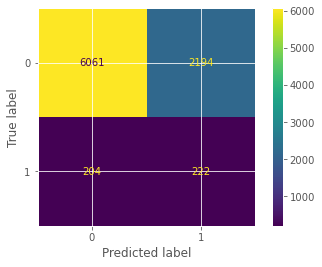

In [54]:
ConfusionMatrixDisplay(confusion_matrix(y_test,pred_lm),display_labels=lm.classes_).plot()

In [55]:
print('classification_report_rf:\n',classification_report(y_test,pred_rf))
confusion_matrix(y_test,pred_rf)

classification_report_rf:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      8255
           1       0.77      0.13      0.22       426

    accuracy                           0.96      8681
   macro avg       0.87      0.56      0.60      8681
weighted avg       0.95      0.96      0.94      8681



array([[8239,   16],
       [ 371,   55]], dtype=int64)

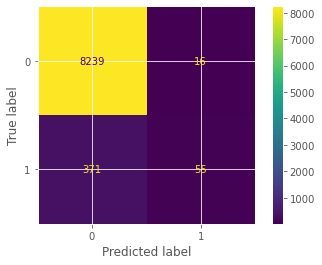

In [56]:
ConfusionMatrixDisplay(confusion_matrix(y_test,pred_rf),display_labels=rf.classes_).plot()

In [57]:
print('classification_report_ab:\n',classification_report(y_test,pred_ab))
confusion_matrix(y_test,pred_ab)

classification_report_ab:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      8255
           1       0.55      0.12      0.20       426

    accuracy                           0.95      8681
   macro avg       0.76      0.56      0.59      8681
weighted avg       0.94      0.95      0.94      8681



array([[8214,   41],
       [ 375,   51]], dtype=int64)

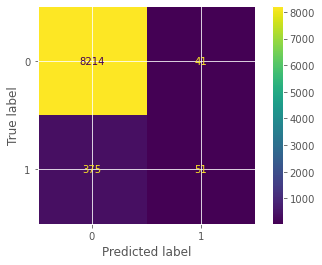

In [58]:
ConfusionMatrixDisplay(confusion_matrix(y_test,pred_ab),display_labels=ab.classes_).plot()

In [59]:
print('classification_report_gbm:\n',classification_report(y_test,pred_gbm))
confusion_matrix(y_test,pred_gbm)

classification_report_gbm:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      8255
           1       0.91      0.34      0.49       426

    accuracy                           0.97      8681
   macro avg       0.94      0.67      0.74      8681
weighted avg       0.96      0.97      0.96      8681



array([[8241,   14],
       [ 282,  144]], dtype=int64)

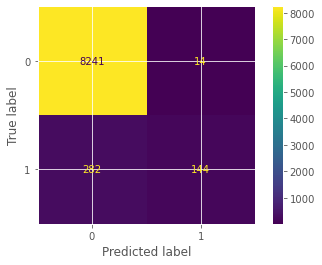

In [60]:
ConfusionMatrixDisplay(confusion_matrix(y_test,pred_gbm),display_labels=gbm.classes_).plot()

In [61]:
print('classification_report_svm:\n',classification_report(y_test,pred_svm))
confusion_matrix(y_test,pred_svm)

classification_report_svm:
               precision    recall  f1-score   support

           0       0.98      0.17      0.29      8255
           1       0.05      0.92      0.10       426

    accuracy                           0.21      8681
   macro avg       0.52      0.55      0.20      8681
weighted avg       0.93      0.21      0.28      8681



array([[1408, 6847],
       [  33,  393]], dtype=int64)

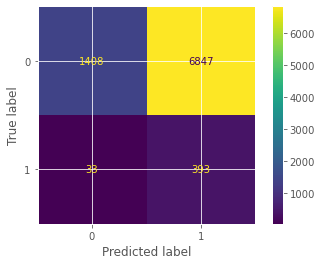

In [62]:
ConfusionMatrixDisplay(confusion_matrix(y_test,pred_svm),display_labels=svm.classes_).plot()

In [ ]:
def save_model(model, model_name, path):
    joblib.dump(model, f'{path}/{model_name}_BaseModel.pkl')
    return None

In [ ]:
save_model(svm,'svm',r'C:\Users\Hp\PycharmProjects\BankruptcyPrediction\models')
save_model(lm,'lm',r'C:\Users\Hp\PycharmProjects\BankruptcyPrediction\models')
save_model(rf,'rf',r'C:\Users\Hp\PycharmProjects\BankruptcyPrediction\models')
save_model(ab,'ab',r'C:\Users\Hp\PycharmProjects\BankruptcyPrediction\models')
save_model(gbm,'gbm',r'C:\Users\Hp\PycharmProjects\BankruptcyPrediction\models')

In [63]:
# GBM Feature Importance

pd.DataFrame({'feature':X.columns,'importance':gbm.feature_importances_}).sort_values('importance',ascending=False).head(10)

,feature,importance
33,operating expenses / total liabilities,0.239880
26,profit on operating activities / financial exp...,0.165222
64,#years,0.070357
4,[(cash + short-term securities + receivables -...,0.065961
45,(current assets - inventory) / short-term liab...,0.056549
55,(sales - cost of products sold) / sales,0.051254
23,gross profit (in 3 years) / total assets,0.040476
43,(receivables * 365) / sales,0.037675
3,current assets / short-term liabilities,0.029586
5,retained earnings / total assets,0.024099


In [64]:
# RF Feature Importance

pd.DataFrame({'feature':X.columns,'importance':rf.feature_importances_}).sort_values('importance',ascending=False).head(10)

,feature,importance
26,profit on operating activities / financial exp...,0.070675
23,gross profit (in 3 years) / total assets,0.049393
45,(current assets - inventory) / short-term liab...,0.035099
25,(net profit + depreciation) / total liabilities,0.026178
33,operating expenses / total liabilities,0.025891
15,(gross profit + depreciation) / total liabilit...,0.025783
5,retained earnings / total assets,0.023538
12,(gross profit + depreciation) / sales,0.021678
38,profit on sales / sales,0.021289
57,total costs /total sales,0.020672


In [65]:
# AdaBoost Feature Importance

pd.DataFrame({'feature':X.columns,'importance':ab.feature_importances_}).sort_values('importance',ascending=False).head(10)

,feature,importance
26,profit on operating activities / financial exp...,0.18
4,[(cash + short-term securities + receivables -...,0.10
38,profit on sales / sales,0.06
45,(current assets - inventory) / short-term liab...,0.06
41,profit on operating activities / sales,0.06
23,gross profit (in 3 years) / total assets,0.06
40,total liabilities / ((profit on operating acti...,0.04
33,operating expenses / total liabilities,0.04
14,(total liabilities * 365) / (gross profit + de...,0.04
57,total costs /total sales,0.04


In [66]:
# Logistic Regression Feature Importance

pd.DataFrame({'feature':X.columns,'importance':lm.coef_[0]}).sort_values('importance',ascending=False).head(10)

,feature,importance
29,(total liabilities - cash) / sales,0.000150
32,operating expenses / short-term liabilities,0.000118
19,(inventory * 365) / sales,0.000080
63,sales / fixed assets,0.000076
33,operating expenses / total liabilities,0.000050
62,sales / short-term liabilities,0.000048
60,sales / receivables,0.000046
42,rotation receivables + inventory turnover in d...,0.000022
39,(current assets - inventory - receivables) / s...,0.000016
31,(current liabilities * 365) / cost of products...,0.000010


In [ ]:
def save_output(pred, proba, y_test,model_name,output_file_path):
    pred_df = pd.DataFrame({'prediction_class':pred,'actual_class' : y_test})
    pred_df.reset_index(inplace=True)
    pred_df.drop(['index'],axis=1,inplace=True)
    prob_df = pd.DataFrame(proba,columns = ['Prob0','Prob1'])
    prob_df.reset_index(inplace=True)
    prob_df.drop(['index'],axis=1,inplace=True)
    pred_df = pd.concat([pred_df,prob_df],axis=1)
    pred_df.to_csv(f'{output_file_path}\predictions_{model_name}.csv')
    return None

In [ ]:
save_output(pred_lm,proba_lm,y_test,'LogisticRegression',r'C:\Users\Hp\PycharmProjects\BankruptcyPrediction\data\output')
save_output(pred_ab,proba_ab,y_test,'AdaBoost',r'C:\Users\Hp\PycharmProjects\BankruptcyPrediction\data\output')
save_output(pred_gbm,proba_gbm,y_test,'GBM',r'C:\Users\Hp\PycharmProjects\BankruptcyPrediction\data\output')
save_output(pred_rf,proba_rf,y_test,'RandomForest',r'C:\Users\Hp\PycharmProjects\BankruptcyPrediction\data\output')
#save_output(pred_svm,proba_svm,y_test,'SVM',r'C:\Users\Hp\PycharmProjects\BankruptcyPrediction\data\output')

### Cross validation

In [68]:
cross_val_score_lm = cross_val_score(lm,X,y,scoring='recall',cv=5)
print('mean cross val score for logistic regression:',np.mean(cross_val_score_lm))
cross_val_score_rf = cross_val_score(rf,X,y,scoring='recall',cv=5)
print('mean cross val score for random forest:',np.mean(cross_val_score_rf))
cross_val_score_ab = cross_val_score(ab,X,y,scoring='recall',cv=5)
print('mean cross val score for adaboost:',np.mean(cross_val_score_ab))
cross_val_score_gbm = cross_val_score(gbm,X,y,scoring='recall',cv=5)
print('mean cross val score for gbm:',np.mean(cross_val_score_gbm))

mean cross val score for logistic regression: 0.5011613433670964
mean cross val score for random forest: 0.1401274394491327
mean cross val score for adaboost: 0.14158340089755742
mean cross val score for gbm: 0.36060910575418803


### Feature Selection

In [67]:
from sklearn.feature_selection import f_classif,SelectKBest,SelectFromModel

In [75]:
# Selecting features based of f-score
f_score_features = f_classif(X,y)

In [79]:
f_classif_df = pd.DataFrame({'feature_names':X.columns,'feature_scores': f_score_features[0],'feature_p_val':f_score_features[1]})
f_classif_df = f_classif_df[f_classif_df['feature_p_val']<0.05]
print(f_classif_df.feature_names)

0                             net profit / total assets 
1                      total liabilities / total assets 
2                        working capital / total assets 
5                      retained earnings / total assets 
6                                   EBIT / total assets 
9                                 equity / total assets 
10     (gross profit + extraordinary items + financia...
11                gross profit / short-term liabilities 
13             (gross profit + interest) / total assets 
15     (gross profit + depreciation) / total liabilit...
17                          gross profit / total assets 
21        profit on operating activities / total assets 
23             gross profit (in 3 years) / total assets 
24              (equity - share capital) / total assets 
25      (net profit + depreciation) / total liabilities 
28                            logarithm of total assets 
31     (current liabilities * 365) / cost of products...
34                       profit

(50, 3)

In [90]:
#selecting features from fitted models
sel_lm = SelectFromModel(estimator=lm,prefit=True)

In [97]:
X.columns[sel_lm.get_support()] #features selected using Logistic Regression 

Index(['book value of equity / total liabilities ',
       'gross profit / short-term liabilities ',
       '(gross profit + depreciation) / total liabilities ',
       'total assets / total liabilities ', '(inventory * 365) / sales ',
       'sales (n) / sales (n-1) ',
       '(net profit + depreciation) / total liabilities ',
       'working capital / fixed assets ',
       '(total liabilities - cash) / sales ',
       'operating expenses / short-term liabilities ',
       'operating expenses / total liabilities ', 'profit on sales / sales ',
       'total liabilities / ((profit on operating activities + depreciation) * (12/365)) ',
       'rotation receivables + inventory turnover in days ',
       '(receivables * 365) / sales ', 'net profit / inventory ',
       '(current assets - inventory) / short-term liabilities ',
       '(inventory * 365) / cost of products sold ',
       'current assets / total liabilities ',
       '(short-term liabilities * 365) / cost of products sold) ',

In [98]:
sel_gbm = SelectFromModel(estimator=gbm,prefit=True)
X.columns[sel_gbm.get_support()]

Index(['current assets / short-term liabilities ',
       '[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365 ',
       'retained earnings / total assets ',
       '(gross profit + depreciation) / sales ', 'sales (n) / sales (n-1) ',
       'gross profit (in 3 years) / total assets ',
       '(net profit + depreciation) / total liabilities ',
       'profit on operating activities / financial expenses ',
       'operating expenses / total liabilities ',
       'profit on sales / total assets ', 'constant capital / total assets ',
       'profit on sales / sales ',
       'total liabilities / ((profit on operating activities + depreciation) * (12/365)) ',
       '(receivables * 365) / sales ',
       '(current assets - inventory) / short-term liabilities ',
       '(inventory * 365) / cost of products sold ',
       '(sales - cost of products sold) / sales ', 'total costs /total sales ',
       '#years', 'sales (n) / sales

In [106]:
sel_k = SelectKBest(k=15).fit(X,y)

In [107]:
X.columns[sel_k.get_support()]

Index(['net profit / total assets ', 'total liabilities / total assets ',
       'working capital / total assets ', 'retained earnings / total assets ',
       'logarithm of total assets ', 'short-term liabilities / total assets ',
       '#years', 'sales (n) / sales (n-1) _missing_val_ind',
       'gross profit (in 3 years) / total assets _missing_val_ind',
       'profit on operating activities / financial expenses _missing_val_ind',
       'working capital / fixed assets _missing_val_ind',
       '(current assets - inventories) / long-term liabilities _missing_val_ind',
       'equity / fixed assets _missing_val_ind',
       'constant capital / fixed assets _missing_val_ind',
       'sales / fixed assets_missing_val_ind'],
      dtype='object')

In [111]:
X_new = sel_lm.transform(X_train)
lm_new = LogisticRegression()
lm_new.fit(X_new,y_train)

LogisticRegression()

In [114]:
print(classification_report(y_test,lm_new.predict(sel_lm.transform(X_test))))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      8255
           1       0.00      0.00      0.00       426

    accuracy                           0.95      8681
   macro avg       0.48      0.50      0.49      8681
weighted avg       0.90      0.95      0.93      8681



In [115]:
confusion_matrix(y_test,lm_new.predict(sel_lm.transform(X_test)))

array([[8246,    9],
       [ 426,    0]], dtype=int64)

In [116]:
X_new = sel_gbm.transform(X_train)
gbm_new = GradientBoostingClassifier()
gbm_new.fit(X_new,y_train)

GradientBoostingClassifier()

In [117]:
print(classification_report(y_test,gbm_new.predict(sel_gbm.transform(X_test))))
confusion_matrix(y_test,gbm_new.predict(sel_gbm.transform(X_test)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      8255
           1       0.93      0.34      0.50       426

    accuracy                           0.97      8681
   macro avg       0.95      0.67      0.74      8681
weighted avg       0.97      0.97      0.96      8681



array([[8244,   11],
       [ 282,  144]], dtype=int64)

In [ ]:
## Next steps would be to retrain using the selected features and hyperparameter tuning

In [ ]:
#hyper Parameter can be tuned using Grid Search CV or Randomized search CV